<a href="https://colab.research.google.com/github/xinyanLyu/fashion-classification/blob/master/452_Individual_Project_fashion_mnist_classification_Sidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Product Classification
                        

 ![fashion deep learning](https://www.creativeapplications.net/wp-content/uploads/2016/02/APPAREL_Vid1.jpg)



 
 * Data source: Fashion-MNIST https://www.kaggle.com/zalando-research/fashionmnist

* Reference: 
 * https://www.kaggle.com/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93
 * https://www.kaggle.com/eliotbarr/fashion-mnist-tutorial
                        
    

# Import Library

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras



print(tf.__version__)

1.13.1


###install plotly

In [0]:
!pip uninstall -q -y plotly
!pip install plotly==3.6.0
import plotly
plotly.__version__

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [0]:
import plotly.offline as py

import plotly.graph_objs as go
import plotly.tools as tls

###Load Library

In [0]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno


Using TensorFlow backend.


#Load Data

##load data from Tensorflow library

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels_df = pd.DataFrame(train_labels)
train_labels_df.head()

,0
0,9
1,0
2,0
3,3
4,0


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Load csv data from GDrive

###Mount GDrive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


###Import Data

In [0]:
import os;os.listdir("/content/gdrive/My Drive/machine_learning/fashion_mnist")

['fashion-mnist_test.csv', 'fashion-mnist_train.csv']

In [0]:
df_train= pd.read_csv("/content/gdrive/My Drive/machine_learning/fashion_mnist/fashion-mnist_train.csv")
df_test  = pd.read_csv("/content/gdrive/My Drive/machine_learning/fashion_mnist/fashion-mnist_test.csv")

In [0]:
df_train_raw = df_train
df_test_raw = df_test

#Ingestion

* Fashion-MNIST data from kaggle. It consists of a training set of 60,000 examples and a test set of 10,000 examples.
* Each example is a 28x28 grayscale image, associated with a label from 10 classes.
* (T-shirt, trouser, coat, sneaker, etc.)

In [0]:
df_train.shape

(60000, 785)

In [0]:
df_test.shape

(10000, 785)

* Each of the  pixels columns except the label column has a single pixel-value ranging from 0-255 , which indicates the darkness of that pixel, with the higher numbers meaning darker. 

In [0]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Combining training and test set to get over 70k samples
img_train = df_train.drop(columns=['label'])
img_test = df_test.drop(columns=['label'])
concat_data = pd.concat([img_train, img_test], ignore_index=True).values

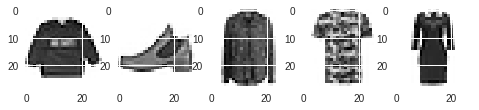

In [0]:
f, ax = plt.subplots(1,5)
f.set_size_inches(8, 4)
for i in range(5):
    ax[i].imshow(img_train.values[i].reshape(28, 28))
plt.show()

#EDA

##Descriptive

In [0]:

labels = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

df_train["label"].replace(labels, inplace=True)
df_test["label"].replace(labels, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


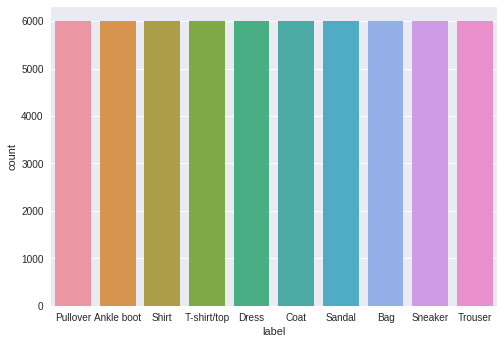

In [0]:

sns.countplot(x='label',data=df_train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


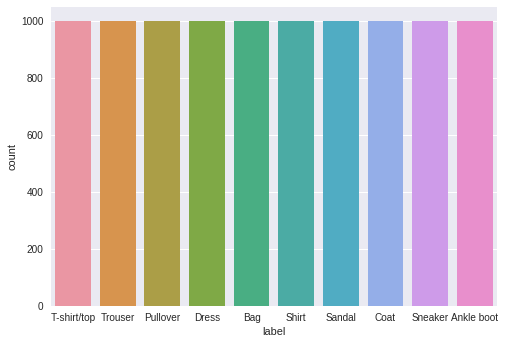

In [0]:
sns.countplot(x='label',data=df_test)

## Sample image

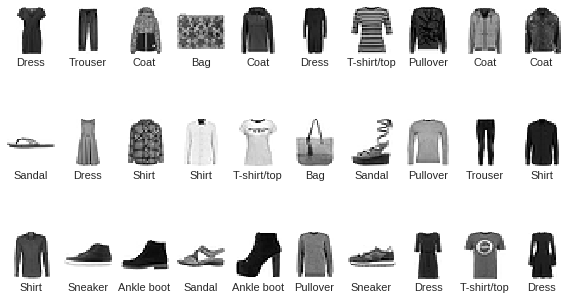

In [0]:
plt.figure(figsize=(10,10))
for i in range(20,50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##Dimension Reduction Diagnostics

In [0]:
df_cluster_features = df_train.drop("label", axis=1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_cluster)
df_cluster_features=scaler.transform(df_cluster_features)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


###scree plot

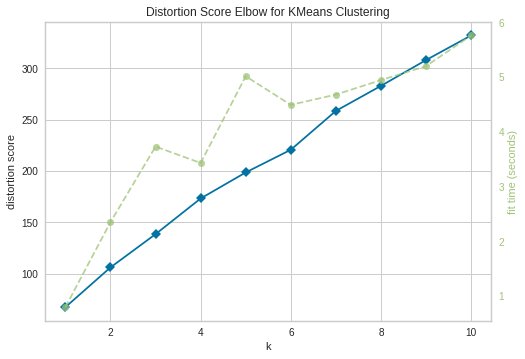

In [0]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df_cluster_features[:5000])    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

###Silhouette Plot

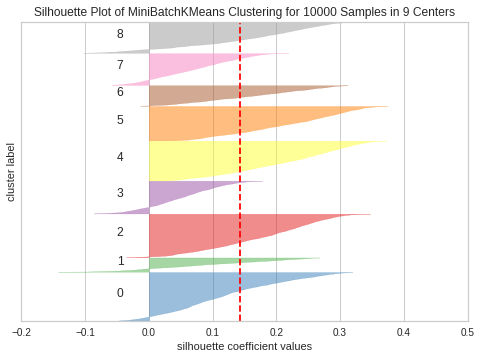

In [0]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(9)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_cluster_features[:10000]) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

###PCA Cumulative Summation of the Explained Variance

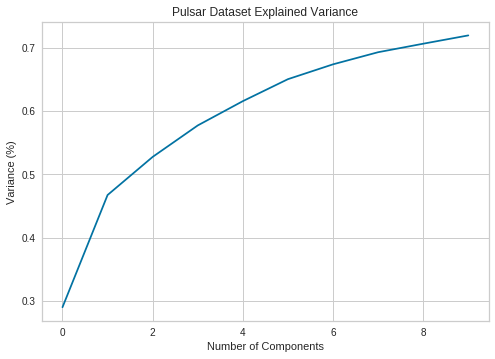

In [0]:
from sklearn.decomposition import PCA 
#Fitting the PCA algorithm with  Data
pca = PCA(n_components=10).fit(df_cluster_features)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

###PCA Biplot

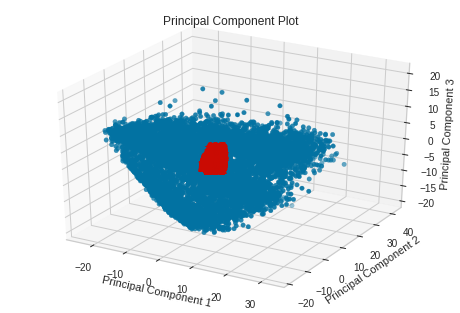

In [0]:
from yellowbrick.features.pca import PCADecomposition
visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=3)
visualizer.fit_transform(df_cluster_features[:10000])
visualizer.poof()

###Normalized PCA projection

In [0]:
colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']

In [0]:
df_train_target = df_train_raw.iloc[:6000, 0]
df_train_images = df_train_raw.iloc[:6000, 1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



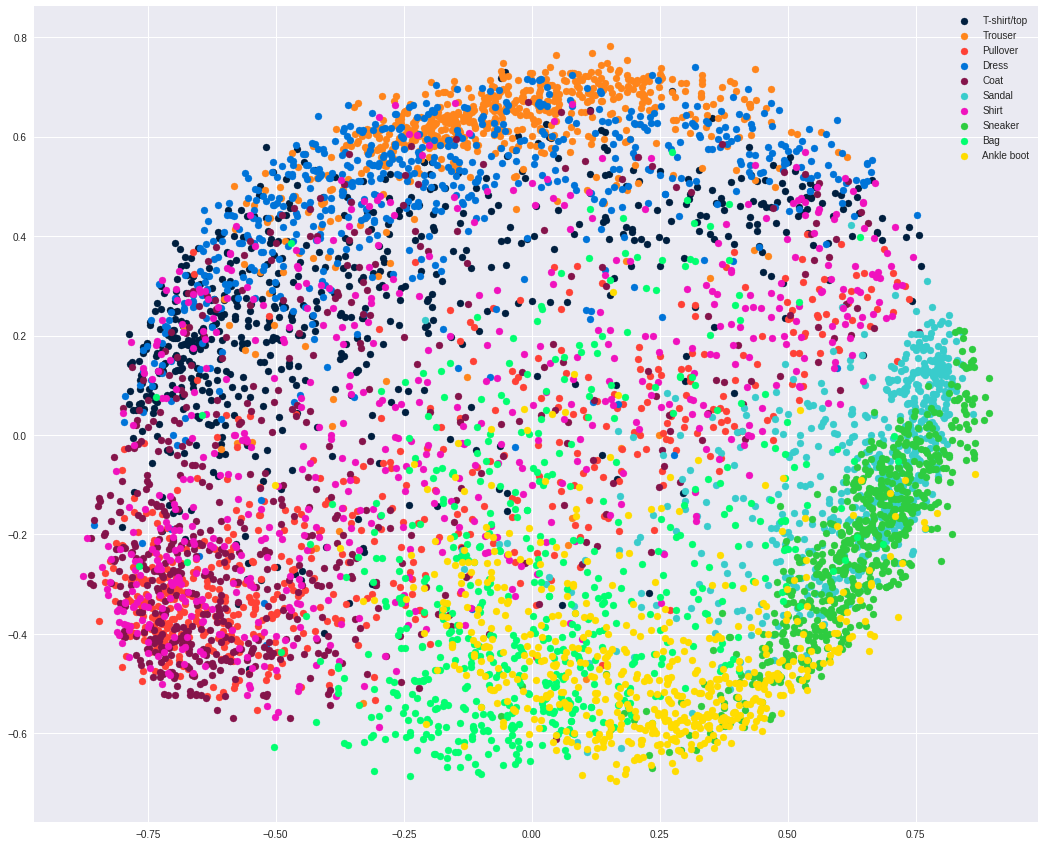

In [0]:
df_train_images_ = StandardScaler().fit_transform(df_train_images)
# push the data to different boundary
df_train_images_ = Normalizer().fit_transform(df_train_images_)
df_train_images_component = PCA(n_components = 2).fit_transform(df_train_images_)

from ast import literal_eval

plt.rcParams["figure.figsize"] = [18, 15]
for k, i in enumerate(np.unique(df_train_target)):
    plt.scatter(df_train_images_component[df_train_target == i, 0],
               df_train_images_component[df_train_target == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = labels[k])
plt.legend()
plt.show()

### T-SNE  projection

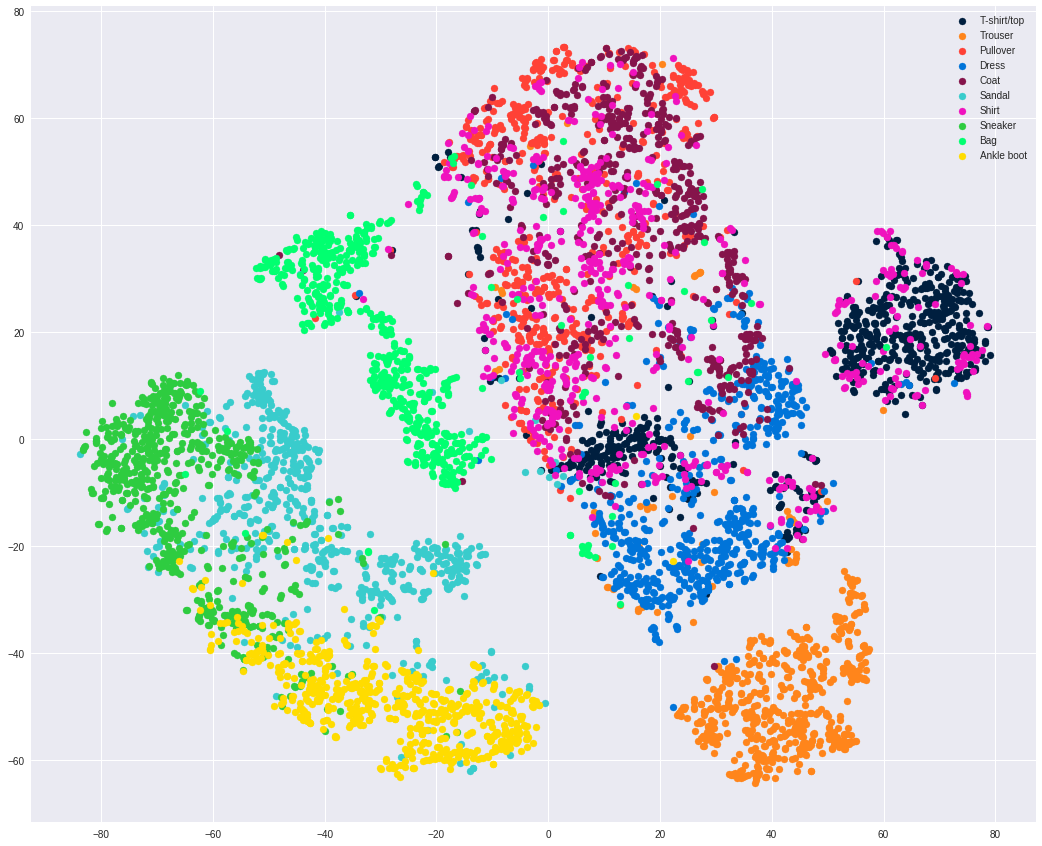

In [0]:
from sklearn.manifold import TSNE
df_train_images_dist = TSNE(n_components = 2).fit_transform(df_train_images)

from ast import literal_eval

plt.rcParams["figure.figsize"] = [18, 15]
for k, i in enumerate(np.unique(df_train_target)):
    plt.scatter(df_train_images_dist[df_train_target == i, 0],
               df_train_images_dist[df_train_target == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = labels[k])
plt.legend()
plt.show()

# Data processing

## set seed

In [0]:
#Setting Random Seeds
seed = 6
np.random.seed(seed)

##split data into Train and Validation Set

In [0]:
X = df_train_raw.iloc[:,1:]
y = df_train_raw.iloc[:,0]
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=seed)

In [0]:
x_train.shape

(54000, 28, 28, 1)

##reshape
*If this had been RGB images, there would have been 3 channels, but as MNIST is gray scale it only uses one.

In [0]:
# reshape(examples, height, width, channels)
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_valid = x_valid.values.reshape((-1, 28, 28, 1))

df_test=df_test_raw.drop('label', axis=1)
df_test = df_test.values.reshape((-1, 28, 28, 1))

##normalization
*The Pixel Values are often stored as Integer Numbers in the range 0 to 255, the range that a single 8-bit byte can offer. They need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. 

In [0]:
x_train = x_train.astype("float32")/255
x_valid = x_valid.astype("float32")/255
df_test = df_test.astype("float32")/255

##encoding category

In [0]:
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
print(y_train.shape)
print(y_valid.shape)

(54000, 10)
(6000, 10)


#Train CNN Model

CNN models can be summarized by two important operations :

* Convolution to transform the input
* Pooling to reduce the dimension of the input (max or average)
![替代文字](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png)



##Building a ConvNet

In [0]:
# Building a ConvNet
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


##Compiling the Model

In [0]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

## Model Summary

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
__________

##Learning Rate Decay

In [0]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

##Data Augmentation
* Reduce overfitting by shift some image to other direction or distort them.

In [0]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [0]:
datagen.fit(x_train)

##Fitting the Model

In [0]:

print("x_train shape",x_train.shape)
print("x_valid shape",x_valid.shape)
print("y_train shape",y_train.shape)
print("y_valid shape",y_valid.shape)

x_train shape (54000, 28, 28, 1)
x_valid shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_valid shape (6000, 10)


* Dropout and data augmentation are tuned to avoid overfitting.
After running 30 epochs, the model is fitted with train data, and finally it reaches around 0.93 accuracy  for train dataset and 0.94 for validation dataset.


In [0]:
batch_size = 128
epochs = 30
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_valid, y_valid), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/30
 - 29s - loss: 0.2693 - acc: 0.9044 - val_loss: 0.2169 - val_acc: 0.9197
Epoch 2/30
 - 29s - loss: 0.2676 - acc: 0.9038 - val_loss: 0.1917 - val_acc: 0.9283
Epoch 3/30
 - 29s - loss: 0.2611 - acc: 0.9056 - val_loss: 0.1918 - val_acc: 0.9317
Epoch 4/30
 - 29s - loss: 0.2571 - acc: 0.9080 - val_loss: 0.1973 - val_acc: 0.9283
Epoch 5/30
 - 29s - loss: 0.2547 - acc: 0.9100 - val_loss: 0.1991 - val_acc: 0.9235
Epoch 6/30
 - 29s - loss: 0.2442 - acc: 0.9121 - val_loss: 0.1795 - val_acc: 0.9353
Epoch 7/30
 - 29s - loss: 0.2438 - acc: 0.9128 - val_loss: 0.1761 - val_acc: 0.9352
Epoch 8/30
 - 29s - loss: 0.2418 - acc: 0.9138 - val_loss: 0.1871 - val_acc: 0.9283
Epoch 9/30
 - 29s - loss: 0.2353 - acc: 0.9147 - val_loss: 0.1791 - val_acc: 0.9370
Epoch 10/30
 - 29s - loss: 0.2309 - acc: 0.9165 - val_loss: 0.1754 - val_acc: 0.9358
Epoch 11/30
 - 29s - loss: 0.2292 - acc: 0.9185 - val_loss: 0.1742 - val_acc: 0.9362
Epoch 12/30
 - 29s - loss: 0.2251 - acc: 0.9196 - val_loss: 0.1746 - val_a

#Model validation and evaluation

##Loss and accuracy of validation

In [0]:
score = model.evaluate(x_valid, y_valid)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

6000/6000 [==============================] - 1s 222us/step
Loss: 0.1654
Accuracy: 0.9410


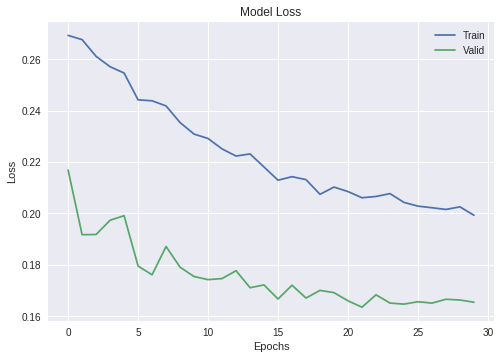

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

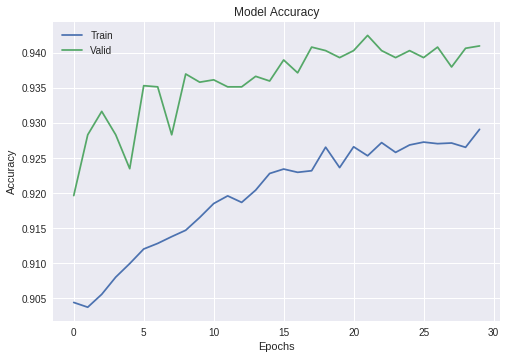

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])
plt.show()

##Confusion Matrix

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='Pastel2'):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="navy" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

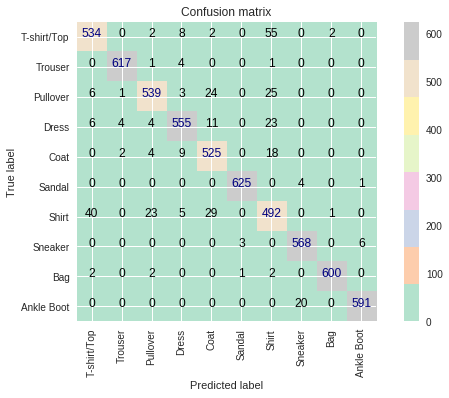

In [0]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

*  We can see that a large number of T-shirt/Top are misclassified as Shirt.
* And nearly 1/6 of Shirts are misclassified.

##Classification report

In [0]:
#The classification report tells us the same story, - shirt has lowest scores, bag has the highest.
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.91      0.89      0.90       603
     Trouser       0.99      0.99      0.99       623
    Pullover       0.94      0.90      0.92       598
       Dress       0.95      0.92      0.94       603
        Coat       0.89      0.94      0.91       558
      Sandal       0.99      0.99      0.99       630
       Shirt       0.80      0.83      0.82       590
     Sneaker       0.96      0.98      0.97       577
         Bag       1.00      0.99      0.99       607
  Ankle Boot       0.99      0.97      0.98       611

   micro avg       0.94      0.94      0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



##Incorrect prediction analysis

In [0]:
incorrect = []
for i in range(len(y_valid)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Pullover\nActual Label : Shirt')

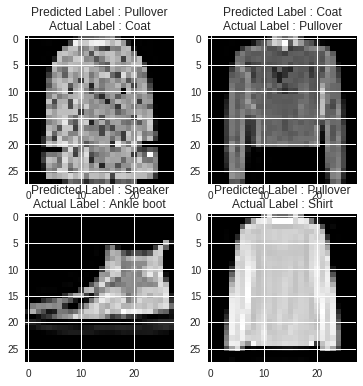

In [0]:
fig, ax = plt.subplots(2,2, figsize=(20,10))
fig.set_size_inches(6,6)
ax[0,0].imshow(x_valid[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(labels[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(labels[Y_true[incorrect[0]]]))

ax[0,1].imshow(x_valid[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(labels[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(labels[Y_true[incorrect[1]]]))

ax[1,0].imshow(x_valid[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(labels[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(labels[Y_true[incorrect[2]]]))

ax[1,1].imshow(x_valid[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(labels[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(labels[Y_true[incorrect[3]]]))

In [0]:
x_valid[incorrect[3]].reshape(28,28), cmap='gray'
plt.figure(figsize=(10,10))
for i in range(20,50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[[incorrect[3]]])
plt.show()

#Classify the Test Data

In [0]:
X = df_test_raw.drop('label',axis=1)
Y = to_categorical(df_test_raw.iloc[:,0])

In [0]:
X = X.values.reshape((-1, 28, 28, 1))
X=X.astype("float32")/255


print(X.shape)
print(Y.shape)

(10000, 28, 28, 1)
(10000, 10)


In [0]:
score = model.evaluate(X, Y)

print("Loss: {:.4f}".format(score[0]))
print("Accuracy: {:.4f}".format(score[1]))

10000/10000 [==============================] - 2s 205us/step
Loss: 0.1628
Accuracy: 0.9442


#Conclusion
* With clean and high quality datasets, we can easily train a model to classify fashion items.
* Since the model classifies items based on the pixel values, which represent darkness, products with similar outlines may be  difficult to be classified, such as shirts, t-shirts and pull  overs. On the contrary, bags have dramatically different outlines with shoes and clothes, so that can be easily distinguished.
* In this case, though increase number of epochs and batch sizes will improve the accuracy, the improvement is small. As for some of the misclassified images， even the Humans won't be able to distinguish, and certain level of inaccuracy can be tolerant in fashion industry, so, it might be meaningless to achieve higher accuracy by endlessly running model with more epochs.


* Next step: training model with datasets with color and other features.

![替代文字](http://file.elecfans.com/web1/M00/6C/39/pIYBAFvjipuAFIs7AADXVTbDi5U379.jpg)

#Application ideas


## 1. Test whether online products are in the right category
* red valentino dress & valentino bag in red color

## **2.Find fashion items you like Online and Image/Visual Search**
* Saw something you like from Pinterest or Instagram, but don't know how to get it?
* Or don't know how to exactly describe with words? 
![替代文字](https://www.ebayinc.com/assets/Uploads/170725-Find-it-on-eBay-Android-1200x660-v2-3.jpg)

![替代文字](https://1m19tt3pztls474q6z46fnk9-wpengine.netdna-ssl.com/wp-content/files/2018/09/visual-search-asos.png)